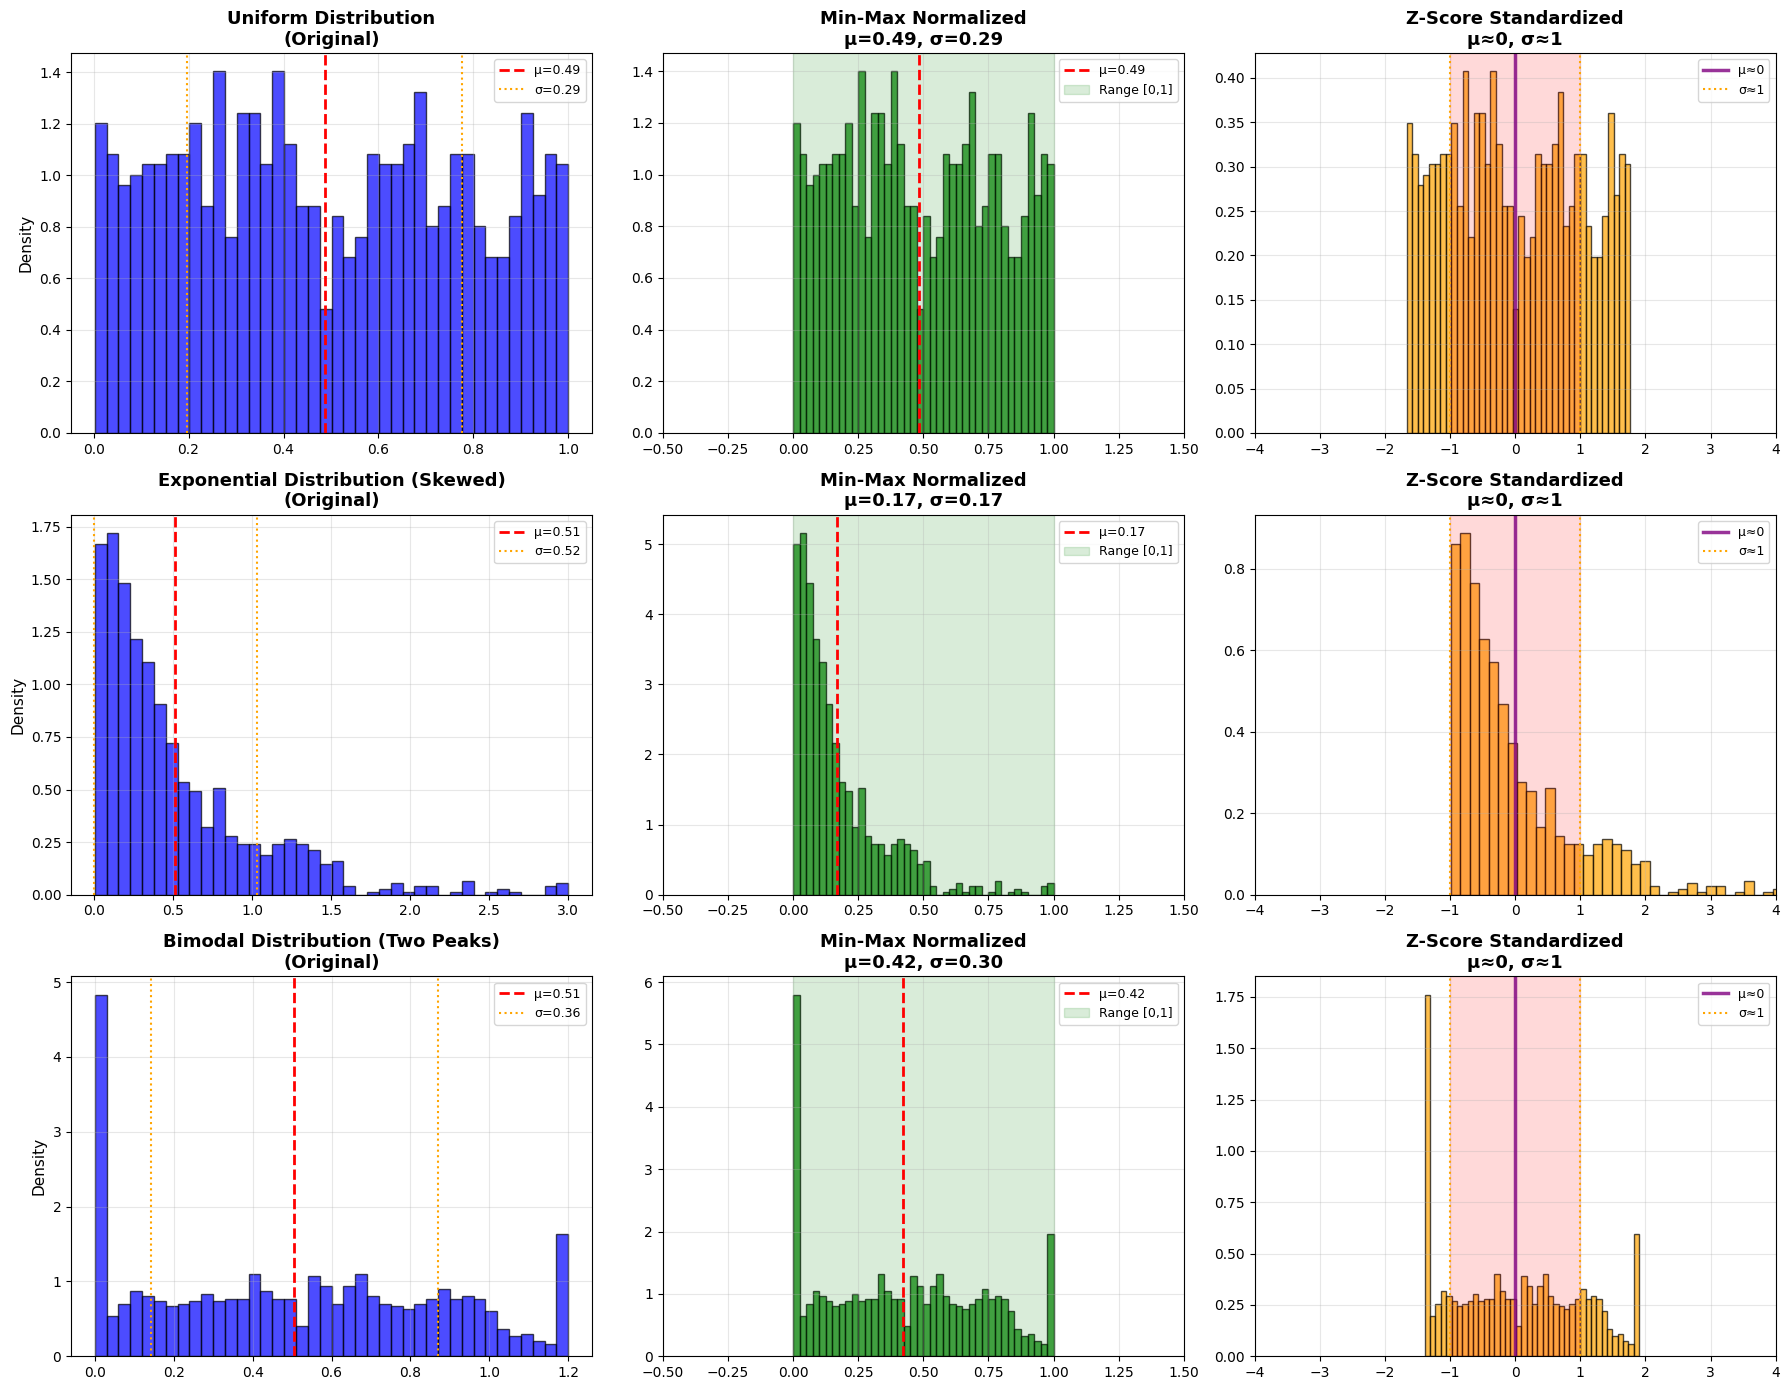

COMPARISON: Non-Normal Distributions

Uniform Distribution:
  Original:    min=0.00, max=1.00, μ=0.49, σ=0.29
  Min-Max:     min=0.00, max=1.00, μ=0.49, σ=0.29
  Z-Score:     min=-1.67, max=1.77, μ=0.000000, σ=1.000000

Exponential Distribution:
  Original:    min=0.00, max=3.00, μ=0.51, σ=0.52
  Min-Max:     min=0.00, max=1.00, μ=0.17, σ=0.17
  Z-Score:     min=-0.99, max=4.83, μ=0.000000, σ=1.000000

Bimodal Distribution:
  Original:    min=0.00, max=1.20, μ=0.51, σ=0.36
  Min-Max:     min=0.00, max=1.00, μ=0.42, σ=0.30
  Z-Score:     min=-1.39, max=1.90, μ=0.000000, σ=1.000000

KEY INSIGHTS FOR NON-NORMAL DATA:
✓ Min-Max: ALWAYS squashes to [0,1] regardless of distribution shape
           → Preserves relative distances within original range
           → Can compress/expand different parts of distribution differently

✓ Z-Score: ALWAYS centers at 0 with σ=1 regardless of distribution shape
           → Preserves the SHAPE of the distribution (skewness, peaks)
           → Outliers c

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(42)

# Create 3 different NON-NORMAL distributions
# 1. Uniform distribution (flat, no peak)
uniform_data = torch.rand(1000)  # Uniformly distributed in [0, 1]

# 2. Exponential distribution (heavy right tail)
exponential_data = torch.distributions.Exponential(rate=2.0).sample((1000,))
exponential_data = torch.clamp(exponential_data, 0, 3)  # Clip for visualization

# 3. Bimodal distribution (two peaks)
bimodal_data = torch.cat([
    torch.randn(500) * 0.3 + 0.2,  # First peak around 0.2
    torch.randn(500) * 0.3 + 0.8   # Second peak around 0.8
])
bimodal_data = torch.clamp(bimodal_data, 0, 1.2)

# Function to apply both normalizations
def compare_normalizations(data, title):
    # Min-Max Normalization
    min_val, max_val = data.min(), data.max()
    min_max = (data - min_val) / (max_val - min_val)
    
    # Z-score Standardization
    mean, std = data.mean(), data.std()
    z_score = (data - mean) / std
    
    return data, min_max, z_score

# Apply to all three distributions
uniform_orig, uniform_minmax, uniform_zscore = compare_normalizations(uniform_data, "Uniform")
exp_orig, exp_minmax, exp_zscore = compare_normalizations(exponential_data, "Exponential")
bimodal_orig, bimodal_minmax, bimodal_zscore = compare_normalizations(bimodal_data, "Bimodal")

# ===== Visualization =====
fig, axes = plt.subplots(3, 3, figsize=(18, 14))

datasets = [
    (uniform_orig, uniform_minmax, uniform_zscore, "Uniform Distribution"),
    (exp_orig, exp_minmax, exp_zscore, "Exponential Distribution (Skewed)"),
    (bimodal_orig, bimodal_minmax, bimodal_zscore, "Bimodal Distribution (Two Peaks)")
]

for row, (orig, minmax, zscore, name) in enumerate(datasets):
    # Original
    ax = axes[row, 0]
    ax.hist(orig.numpy(), bins=40, alpha=0.7, color='blue', edgecolor='black', density=True)
    ax.axvline(orig.mean().item(), color='red', linestyle='--', linewidth=2, 
               label=f'μ={orig.mean():.2f}')
    ax.axvline(orig.mean().item() - orig.std().item(), color='orange', linestyle=':', linewidth=1.5)
    ax.axvline(orig.mean().item() + orig.std().item(), color='orange', linestyle=':', linewidth=1.5,
               label=f'σ={orig.std():.2f}')
    ax.set_title(f'{name}\n(Original)', fontsize=13, fontweight='bold')
    ax.set_ylabel('Density', fontsize=11)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=9)
    
    # Min-Max
    ax = axes[row, 1]
    ax.hist(minmax.numpy(), bins=40, alpha=0.7, color='green', edgecolor='black', density=True)
    ax.axvline(minmax.mean().item(), color='red', linestyle='--', linewidth=2,
               label=f'μ={minmax.mean():.2f}')
    ax.axvspan(0, 1, alpha=0.15, color='green', label='Range [0,1]')
    ax.set_title(f'Min-Max Normalized\nμ={minmax.mean():.2f}, σ={minmax.std():.2f}', 
                 fontsize=13, fontweight='bold')
    ax.set_xlim(-0.5, 1.5)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=9)
    
    # Z-score
    ax = axes[row, 2]
    ax.hist(zscore.numpy(), bins=40, alpha=0.7, color='orange', edgecolor='black', density=True)
    ax.axvline(0, color='purple', linestyle='-', linewidth=2.5, alpha=0.8, label='μ≈0')
    ax.axvline(-1, color='orange', linestyle=':', linewidth=1.5)
    ax.axvline(1, color='orange', linestyle=':', linewidth=1.5, label='σ≈1')
    ax.axvspan(-1, 1, alpha=0.15, color='red')
    ax.set_title(f'Z-Score Standardized\nμ≈0, σ≈1', fontsize=13, fontweight='bold')
    ax.set_xlim(-4, 4)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=9)

plt.tight_layout()
plt.show()

# ===== Key Statistics Comparison =====
print("="*80)
print("COMPARISON: Non-Normal Distributions")
print("="*80)

for name, orig, minmax, zscore in [
    ("Uniform", uniform_orig, uniform_minmax, uniform_zscore),
    ("Exponential", exp_orig, exp_minmax, exp_zscore),
    ("Bimodal", bimodal_orig, bimodal_minmax, bimodal_zscore)
]:
    print(f"\n{name} Distribution:")
    print(f"  Original:    min={orig.min():.2f}, max={orig.max():.2f}, μ={orig.mean():.2f}, σ={orig.std():.2f}")
    print(f"  Min-Max:     min={minmax.min():.2f}, max={minmax.max():.2f}, μ={minmax.mean():.2f}, σ={minmax.std():.2f}")
    print(f"  Z-Score:     min={zscore.min():.2f}, max={zscore.max():.2f}, μ={zscore.mean():.6f}, σ={zscore.std():.6f}")

print("\n" + "="*80)
print("KEY INSIGHTS FOR NON-NORMAL DATA:")
print("="*80)
print("✓ Min-Max: ALWAYS squashes to [0,1] regardless of distribution shape")
print("           → Preserves relative distances within original range")
print("           → Can compress/expand different parts of distribution differently")
print()
print("✓ Z-Score: ALWAYS centers at 0 with σ=1 regardless of distribution shape")
print("           → Preserves the SHAPE of the distribution (skewness, peaks)")
print("           → Outliers can result in very large positive/negative values")
print("           → Does NOT make data normal if it wasn't before!")
print("="*80)